In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import cv2
from PIL import Image, ImageDraw, ImageFont

In [2]:
# load the trained models

model_path = 'models/'
model1 = load_model(model_path + 'model-cnn.h5')
model2 = load_model(model_path + 'model-vgg.h5')
model3 = load_model(model_path + 'model-resnet.h5')
model4 = load_model(model_path + 'model-densenet.h5')

In [3]:
# use the models to predict expression of face

def predict_on_ensemble(img):
    
    predictions1 = model1.predict(img.reshape(1,48,48,1), verbose=0)
    predictions2 = model2.predict(img.reshape(1,48,48,1), verbose=0)
    predictions3 = model3.predict(img.reshape(1,48,48,1), verbose=0)
    predictions4 = model4.predict(img.reshape(1,48,48,1), verbose=0)

    combined_prediction = np.zeros((7))

    combined_prediction = (predictions1 + predictions2 + predictions3 + predictions4)/4
    combined_prediction = np.argmax(combined_prediction, axis=1)

    return int(combined_prediction)

In [18]:
# function to detect faces and return image with emotion represented

def detect_emotion(imagePath):
    img_rgb = Image.open(imagePath)         # open image
    gray_image = img_rgb.convert('L')       # convert to grayscale
    gray_image = np.array(gray_image)       # convert image to numpy array
    face_classifier = cv2.CascadeClassifier(
        cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
    )
    face = face_classifier.detectMultiScale(                                # detect faces from image
        gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(60,60)        
    )
    final_img = img_rgb.copy()

    if len(face) == 0:
        print('No faces detected.')
        return
    

    for (x, y, w, h) in face:
        cropped_img = img_rgb.crop([x,y, x+w, y+h])
        resized_img = cropped_img.resize((48,48))
        processed_img = resized_img.convert('L')
        processed_img = np.array(processed_img)/255.0
        pred_class = predict_on_ensemble(processed_img)
        classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
        output = classes[pred_class]

        draw = ImageDraw.Draw(final_img)
       
        draw.rectangle([(x, y), ((x + w), (y + h))], outline='lime', width=3)       # draw rectangle around face
        
        font_size=int(h * 0.13)

        font = ImageFont.truetype("arial.ttf", font_size)

        padding = int(font_size * 0.25)  # add some padding around the text

        # calculate text size and position
        position = (x/final_img.width,y/final_img.height)

        # set box for text
        bbox = draw.textbbox(position, output, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        text_x = int((final_img.width) * position[0] + padding)
        text_y = int((final_img.height) * position[1] + padding)

        # define background rectangle coordinates
        rect_x0 = text_x - padding
        rect_y0 = text_y - padding
        rect_x1 = text_x + text_width + 2*padding
        rect_y1 = text_y + text_height + 2*padding

        # draw the background rectangle
        draw.rectangle([rect_x0, rect_y0, rect_x1, rect_y1], fill='lime')

        # Add text to image
        draw.text((text_x, text_y), output, font=font, fill='red')
    
    plt.axis('off')
    plt.imshow(final_img)

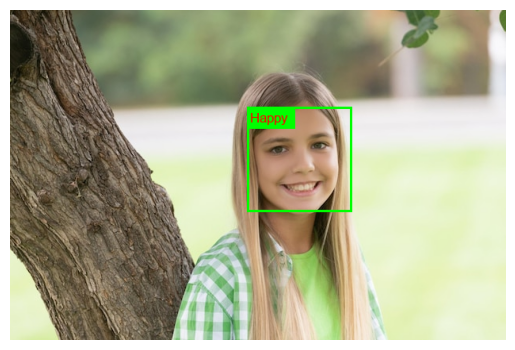

In [19]:
detect_emotion('test_images/face1.jpg')

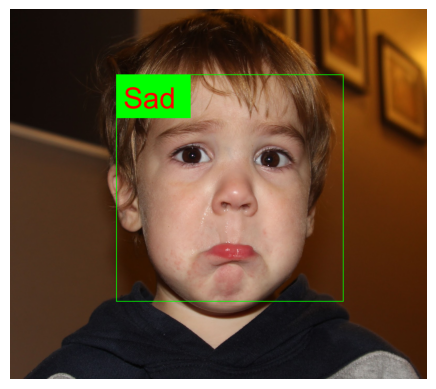

In [20]:
detect_emotion('test_images/face2.jpg')

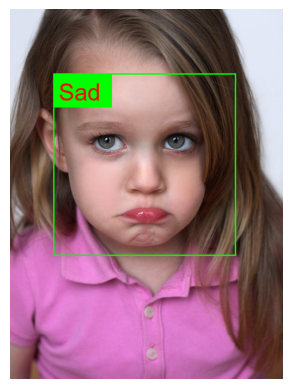

In [21]:
detect_emotion('test_images/face3.jpg')

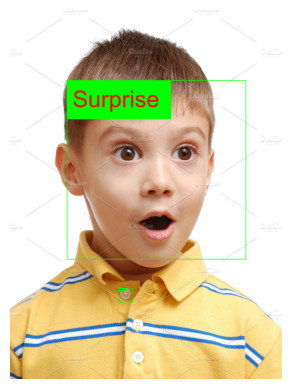

In [22]:
detect_emotion('test_images/face4.jpg')

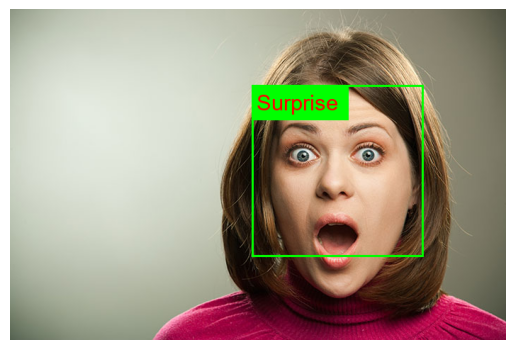

In [23]:
detect_emotion('test_images/face5.jpg')

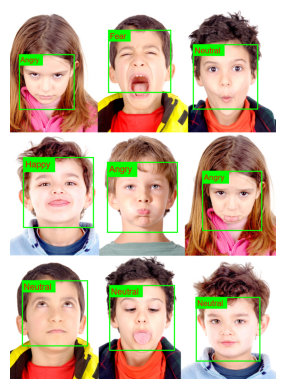

In [24]:
detect_emotion('test_images/face6.jpg')

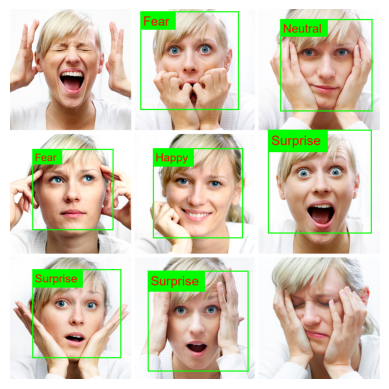

In [25]:
detect_emotion('test_images/face8.jpg')

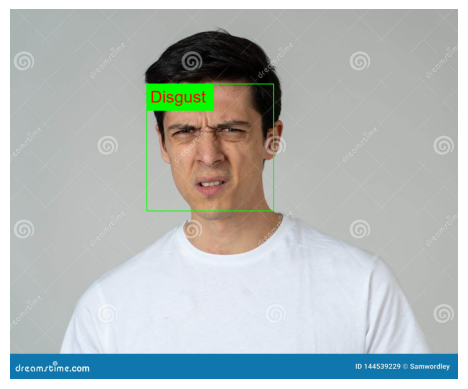

In [26]:
detect_emotion('test_images/face9.jpg')

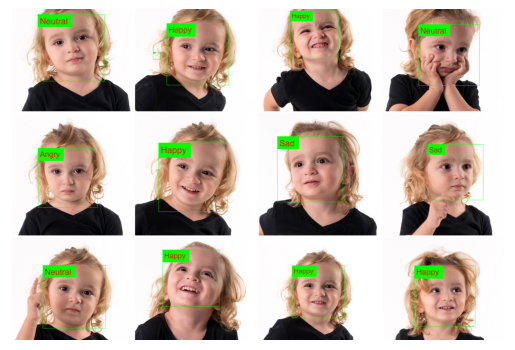

In [27]:
detect_emotion('test_images/face10.jpg')

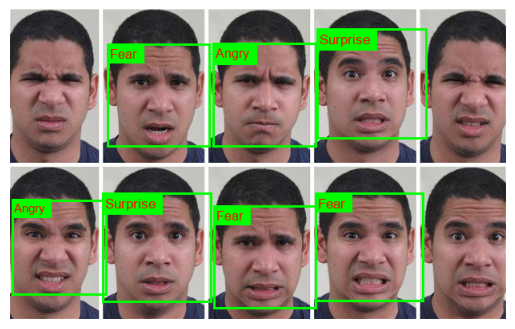

In [28]:
detect_emotion('test_images/face11.jpg')